# task 1

# import neccesary library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime

# read file 

In [2]:
df = pd.read_csv(r'C:\Users\Mohammad\Desktop\task\task 1\tullow.csv' , index_col=0, parse_dates=True)

# rename 'new_index' column to 'datetime'  

In [3]:
df = df.rename(columns={"new_index": "datetime"})

# convert type of 'datetime' column to datetime

In [4]:
df["datetime"] = pd.to_datetime(df["datetime"])

# calculate 10_day & 20_day  MA(moving average)

In [5]:
df['SMA_10'] = df['price'].rolling(14640).mean()
df['SMA_20'] = df['price'].rolling(29280).mean()

# Generate Trade signals from crossovers

In [6]:
df['Signal'] = 0.0
df['Signal'] = np.where(df['SMA_10'] > df['SMA_20'], 1.0, 0.0)
df['Position'] = df['Signal'].diff()

# set figure size & color & label of each plot

# specify position on plot (golden & death cross)

Figure(1584x720)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
Text(0.5, 1.0, 'Moving Average')


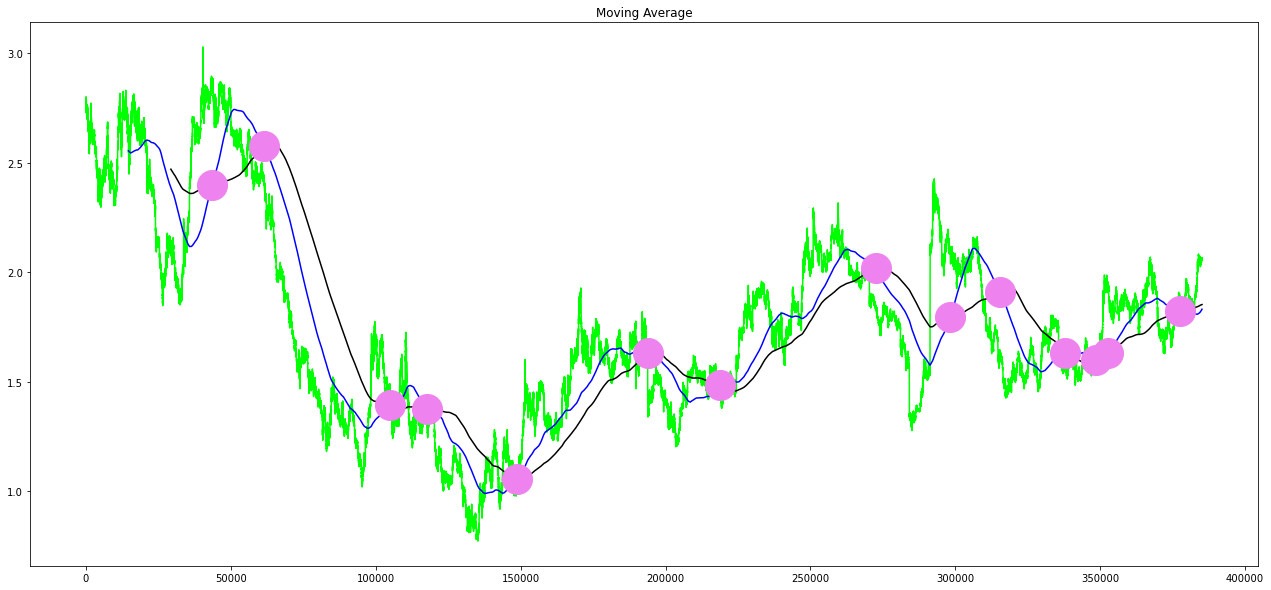

In [7]:
print(plt.figure(figsize = (22,10)))
print(df['price'].plot(color = 'lime', label= 'price'))
print(df['SMA_10'].plot(color = 'b',label = '10-day SMA'))
print(df['SMA_20'].plot(color = 'k', label = '20-day SMA'))
print(plt.plot(df[df['Position'] == 1].index, df['SMA_10'][df['Position'] == 1], 'o', markersize = 30, color = 'violet', label = 'buy'))
print(plt.plot(df[df['Position'] == -1].index, df['SMA_10'][df['Position'] == -1], 'o', markersize = 30, color = 'violet', label = 'sell'))
print(plt.title('Moving Average'))

# specify position 

In [8]:
previous_10 = df['SMA_10'].shift(1)
previous_20 = df['SMA_20'].shift(1)
golden_cross = (((df['SMA_10'] <= df['SMA_20']) & (previous_10 >= previous_20)))
death_cross =  (((df['SMA_10'] >= df['SMA_20']) & (previous_10 <= previous_20)))

# define position time and price

In [9]:
golden_cross_price = df.loc[golden_cross,'price']
golden_cross_time = df.loc[golden_cross,'datetime']
death_cross_price = df.loc[death_cross,'price']
death_cross_time = df.loc[death_cross,'datetime']

# define subtract price of crossovers (profit or loss)

# and convert into dataframe and plot it

AxesSubplot(0.125,0.125;0.775x0.755)
Text(0.5, 1.0, 'profit or loss')


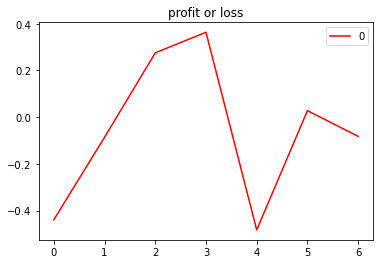

In [10]:
list_price_of_golden_cross = []
for i in df.loc[golden_cross,'price']:
    list_price_of_golden_cross.append(i)
    
list_price_of_death_cross = []
for i in df.loc[death_cross,'price']:
    list_price_of_death_cross.append(i)
    
subtract_price = []
for i in range(7):
    result = list_price_of_golden_cross[i] - list_price_of_death_cross[i]
    subtract_price.append(result)
    
df1 = pd.DataFrame(subtract_price) 
print(df1.plot(color = 'r' , label = 'profit and loss'))
print(plt.title('profit or loss'))

# define subtract time of crossovers 

# and convert into dataframe and calculate mean of them

In [11]:
list_time_of_golden_cross = []
for i in df.loc[golden_cross,'datetime']:
    list_time_of_golden_cross.append(i)
    
list_time_of_death_cross = []
for i in df.loc[death_cross,'datetime']:
    list_time_of_death_cross.append(i)
    
subtract_time = []
for i in range(7):
    result = list_time_of_golden_cross[i] - list_time_of_death_cross[i]
    subtract_time.append(result)
    
df2 = pd.DataFrame(subtract_time)
print('the mean of position time is:')
print(df2.mean())

the mean of position time is:
0   74 days 09:00:34.285714286
dtype: timedelta64[ns]


# plot histogram of subtract price

[[<AxesSubplot:title={'center':'0'}>]]
Text(0.5, 1.0, 'Experimental distribution')


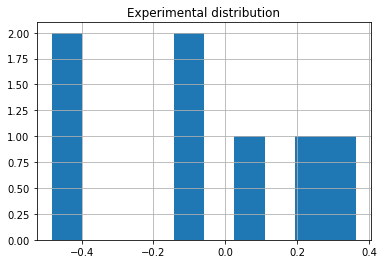

In [12]:
print(df1.hist())
print(plt.title('Experimental distribution'))

# task 2 

# read file

In [13]:
df3 = pd.read_excel(r'C:\Users\Mohammad\Desktop\task\tullow_nos.xlsx')
df4 = pd.read_csv(r'C:\Users\Mohammad\Desktop\task\tullow.csv' , index_col=0, parse_dates=True)

# convert type of 'datetime' column to datetime

In [14]:
df4["new_index"] = pd.to_datetime(df4["new_index"])

# seperate date & time from 'datetime' column 

# and drop(delete) 'new_index' column 

In [15]:
df4['date'] = [d.date() for d in df4['new_index']]
df4['time'] = [d.time() for d in df4['new_index']]
df4 = df4.drop(columns='new_index')
df4["date"] = pd.to_datetime(df4["date"])

# merge two dataframe on 'date' column

In [16]:
inner_merged = pd.merge(df4,df3, on=["date"])

# define 'MarketCap' column with MarketCap formula

# and plot 'MarketCap' 

AxesSubplot(0.125,0.125;0.775x0.755)
Text(0.5, 1.0, 'Market Cap')


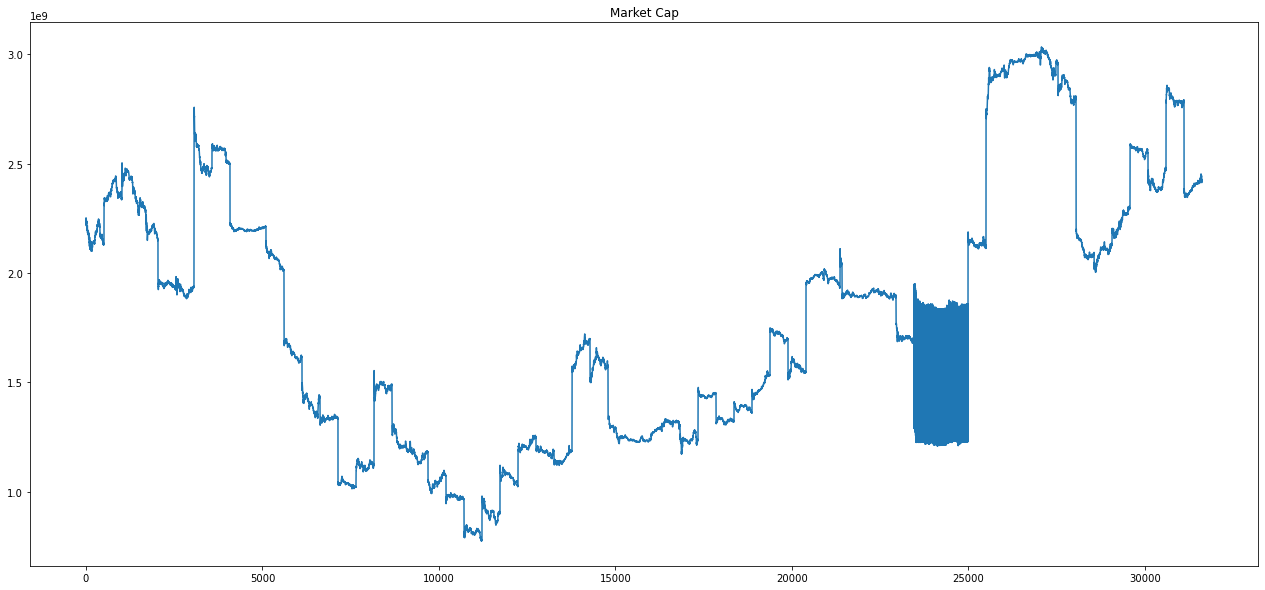

In [17]:
inner_merged['MarketCap'] = inner_merged['price'] * inner_merged['num_of_shares']
print(inner_merged['MarketCap'].plot(label = 'Tullow', figsize = (22,10)))
print(plt.title('Market Cap'))